<a href="https://colab.research.google.com/github/4k5h1t/Learning-ML/blob/main/SVMfromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines Workshop (Draft)

## Simple Classification Problem using the Fischer Iris Dataset

### From Scratch

*Note : This program is just for the draft and for a very basic understanding of the concept  
        More complex datasets will be used in the final presentation*


Scroll down to the last two blocks for the actual implementation and testing


### Modifying Actual Dataset to fit our purposes

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (3).csv


In [ ]:
import pandas as pd
import io

# Reading Dataset
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

# Dropping ID column (Unnecessary) 
df = df.drop(['Id'],axis = 1)

# Dropping Sepal and Petal Width Column, for simplicity
df = df.drop(['SepalWidthCm', 'PetalWidthCm'], axis = 1)

# Making a list of the possible species
target = df['Species']
s = set()
for val in target:
    s.add(val)
s = list(s)

# Dropping the rows we are not looking at (Disregarding the Virginica species, for simplicity)
rows = list(range(100,150))
df = df.drop(df.index[rows])

print(df)

    SepalLengthCm  PetalLengthCm          Species
0             5.1            1.4      Iris-setosa
1             4.9            1.4      Iris-setosa
2             4.7            1.3      Iris-setosa
3             4.6            1.5      Iris-setosa
4             5.0            1.4      Iris-setosa
..            ...            ...              ...
95            5.7            4.2  Iris-versicolor
96            5.7            4.2  Iris-versicolor
97            6.2            4.3  Iris-versicolor
98            5.1            3.0  Iris-versicolor
99            5.7            4.1  Iris-versicolor

[100 rows x 3 columns]


This is the final table we will be working with


### Visualizing our Goal

Green + shows Setosa, Red - is Versicolor


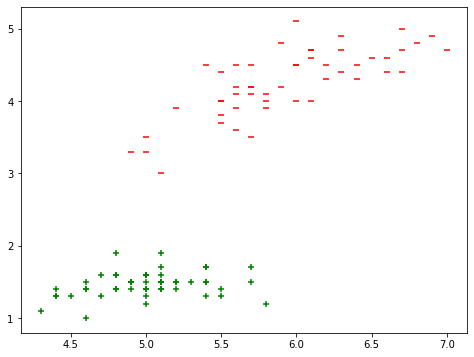

In [ ]:
import matplotlib.pyplot as plt

x = df['SepalLengthCm']
y = df['PetalLengthCm']

# We know that 1-49 is the setosa species and 50-99 is the versicolor species

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

# Green + is Setosa, Red - is Versicolor
print("Green + shows Setosa, Red - is Versicolor")
plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()

We can see that it is possible for a line to accurately split this dataset 

*Note : This is a simplified version for learning purposes, actual datasets might have more crossover within the two types*  


### Setting up for SVM Implementation

#### Creating X and Y and splitting into Training and Test Sets

In [ ]:
#Importing packages for more convenient sampling

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

# Making a list where we are assigning values of -1 to Setosa and +1 to Versicolor
# This is going to be our Y axis
Y = []
for val in df['Species']:
    if(val == 'Iris-setosa'):
        Y.append(-1)
    else:
        Y.append(1)

# We do not need the 'Species' column now, because of the above assigned values
df = df.drop(['Species'],axis=1)

# Making a list of the pairs of Sepal length and Petal length to be our X axis
X = df.values.tolist()

## Shuffle and split the data into training and test set
X, Y = shuffle(X,Y)

# Splitting X and Y to training and testing set with 80% used as training
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

# Setting all to arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)


# Reshaping Y to fit the dimensions of X
y_train = y_train.reshape(80,1)
y_test = y_test.reshape(20,1)

[[5.1, 1.4], [4.9, 1.4], [4.7, 1.3], [4.6, 1.5], [5.0, 1.4], [5.4, 1.7], [4.6, 1.4], [5.0, 1.5], [4.4, 1.4], [4.9, 1.5], [5.4, 1.5], [4.8, 1.6], [4.8, 1.4], [4.3, 1.1], [5.8, 1.2], [5.7, 1.5], [5.4, 1.3], [5.1, 1.4], [5.7, 1.7], [5.1, 1.5], [5.4, 1.7], [5.1, 1.5], [4.6, 1.0], [5.1, 1.7], [4.8, 1.9], [5.0, 1.6], [5.0, 1.6], [5.2, 1.5], [5.2, 1.4], [4.7, 1.6], [4.8, 1.6], [5.4, 1.5], [5.2, 1.5], [5.5, 1.4], [4.9, 1.5], [5.0, 1.2], [5.5, 1.3], [4.9, 1.5], [4.4, 1.3], [5.1, 1.5], [5.0, 1.3], [4.5, 1.3], [4.4, 1.3], [5.0, 1.6], [5.1, 1.9], [4.8, 1.4], [5.1, 1.6], [4.6, 1.4], [5.3, 1.5], [5.0, 1.4], [7.0, 4.7], [6.4, 4.5], [6.9, 4.9], [5.5, 4.0], [6.5, 4.6], [5.7, 4.5], [6.3, 4.7], [4.9, 3.3], [6.6, 4.6], [5.2, 3.9], [5.0, 3.5], [5.9, 4.2], [6.0, 4.0], [6.1, 4.7], [5.6, 3.6], [6.7, 4.4], [5.6, 4.5], [5.8, 4.1], [6.2, 4.5], [5.6, 3.9], [5.9, 4.8], [6.1, 4.0], [6.3, 4.9], [6.1, 4.7], [6.4, 4.3], [6.6, 4.4], [6.8, 4.8], [6.7, 5.0], [6.0, 4.5], [5.7, 3.5], [5.5, 3.8], [5.5, 3.7], [5.8, 3.9], [6.


## Implementing SVM

### Training 

In [ ]:
## Support Vector Machine 

import numpy as np

train_f1 = x_train[:,0] # Sepal Length
train_f2 = x_train[:,1] # Petal Length

#f1 is 'feature-1' ie. Sepal Length

train_f1 = train_f1.reshape(80,1)
train_f2 = train_f2.reshape(80,1)

w1 = np.zeros((80,1))
w2 = np.zeros((80,1))

epochs = 1      # Epochs is basically an iteration count
alpha = 0.0001  # Alpha is the learning rate

while(epochs < 10000):
    y = w1 * train_f1 + w2 * train_f2
    prod = y * y_train

    count = 0
    for val in prod:
        if(val >= 1):
            cost = 0
            w1 = w1 - alpha * (2 * 1/epochs * w1)       # 1/epochs is the regularization parameter lambda
            w2 = w2 - alpha * (2 * 1/epochs * w2)
            
        else:
            cost = 1 - val 
            w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1/epochs * w1)
            w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1/epochs * w2)
        count += 1
    epochs += 1


### Testing Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

## Clip the weights 
index = list(range(20,80))
w1 = np.delete(w1,index)
w2 = np.delete(w2,index)

w1 = w1.reshape(20,1)
w2 = w2.reshape(20,1)

## Extract the test data features 
test_f1 = x_test[:,0]
test_f2 = x_test[:,1]

test_f1 = test_f1.reshape(20,1)
test_f2 = test_f2.reshape(20,1)


## Predict
y_pred = w1 * test_f1 + w2 * test_f2
predictions = []

# Checking whether correctly Identified or not
for val in y_pred:
    if(val > 1):
        predictions.append(1)
    else:
        predictions.append(-1)

print(accuracy_score(y_test,predictions))

1.0
